In [1]:
import glob,os
import pandas as pd
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
from datetime import datetime, timedelta

warnings.filterwarnings("ignore")

In [2]:
oripath = '../Results/soundsepration'
dp = pd.read_csv('../Results/soundsepration/experiment_period.txt')

In [30]:
def figure_base_setting(ax):
    ax.set_xlim(datetime(2023, 4, 1) ,datetime(2024, 1, 15))

    ax.grid(axis='y', color='lightgrey')
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))



../Results/soundsepration/Keelung-5min/20240125_160851_2023_4stage_separation/result_normalized_each_stage/stats.log
../Results/soundsepration/Taoyuan-5min/20240125_161423_2023_4stage_separation/result_normalized_each_stage/stats.log


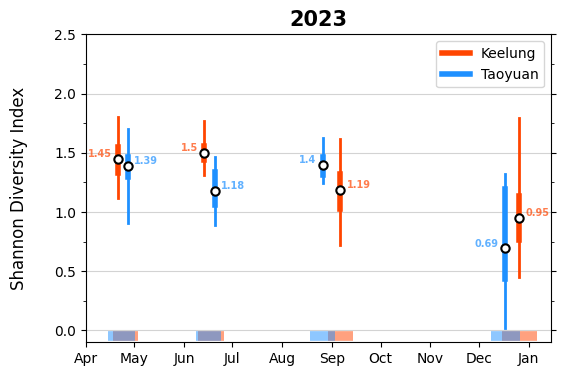

In [31]:
plt.rcParams["font.family"] = "DejaVu Sans"
fig, ax = plt.subplots(1,figsize=(6,4), sharey=True)
plt.subplots_adjust(wspace = 0.09) 

            
# for idx in range(1, 5):
#     dp_ = dp[dp['region']=='Keelung'][dp['year']==int('2023')][dp['index']==idx]
#     begin = dp_['begin'].values[0]; end = dp_['end'].values[0]
#     begintime = datetime.strptime(begin, "%Y-%m-%dT%H:%M:%S")
#     endtime = datetime.strptime(end, "%Y-%m-%dT%H:%M:%S") 
#     ax[1].hlines(xmin=begintime, xmax=endtime, y=-0.05, lw=7, color='orangered', alpha=0.5)   
    
for path in glob.glob(f'{oripath}/*-5min/*2023_*stage_separation/result_nor*/*log'):
    year = path.rsplit('_')[2]
    if int(year) == 2023 and '3stage' in path:
        continue 
    else:
        
        color = 'orangered' if 'Keelung' in path else 'dodgerblue'
        region = 'Keelung' if 'Keelung' in path else 'Taoyuan'
        dx = -0.15 if 'Keelung' in path else 0.15

        cmd = ''' awk -F, 'NR>1 {print $0}' %(path)s
        '''%locals()
        response = os.popen(cmd).read()
        res_year = response.rsplit('\n')

        print(path)
        if int(year) == 2021:
            pidx = 0 
        elif int(year) == 2022:
            pidx = 1
        elif int(year) == 2023:
            pidx = 2  
        ax.set_title(year, fontsize=15, fontweight='bold')

        readcol = 3 if int(year) != 2023 else 4
        for info in res_year[:readcol]:
            stats = info.split(',', 9)
            idx  = int(stats[1])
            pct5 = float(stats[2])
            Q1   = float(stats[3])
            Q2   = float(stats[4])
            Q3   = float(stats[5])
            pct95   = float(stats[6])

            dp_ = dp[dp['region']==region][dp['year']==int(year)][dp['index']==idx]
            begin = dp_['begin'].values[0]; end = dp_['end'].values[0]
            begintime = datetime.strptime(begin, "%Y-%m-%dT%H:%M:%S")
            endtime = datetime.strptime(end, "%Y-%m-%dT%H:%M:%S")
            dt = endtime - begintime
            if idx == 3 or idx==4:
                ddt = 0 if region == 'Taoyuan' else 0
                align = 'right' if region == 'Taoyuan' else 'left'
            else:
                ddt = -4 if region == 'Keelung' else 4
                align = 'right' if region == 'Keelung' else 'left'
            
            plottime = begintime + timedelta(days=dt.days/2+ddt)      

            ax.hlines(xmin=begintime, xmax=endtime, y=-0.05, lw=7, color=color, alpha=0.5)
            ax.plot([plottime, plottime], [pct5, pct95], lw=2, color=color)
            ax.plot([plottime, plottime], [Q1, Q3], lw=4, color=color, label = region)
            ax.plot([plottime], [Q2], marker = 'o', markersize = 6, color='white', mec='k', mew=1.5)# ,edgecolors='k', lw=2
            if idx == 3 or idx==4:
                if region == 'Taoyuan':
                    ax.text(plottime + timedelta(days=-4), Q2, float("{:.2f}".format(Q2,2)), color=color, alpha=0.7,
                              ha=align, va ='bottom', fontsize=7, fontweight='heavy')
                elif region == 'Keelung':
                    ax.text(plottime + timedelta(days=4), Q2, float("{:.2f}".format(Q2,2)), color=color, alpha=0.7,
                              ha=align, va ='bottom', fontsize=7, fontweight='heavy')
            else:
                ax.text(plottime + timedelta(days=ddt), Q2, float("{:.2f}".format(Q2,2)), color=color, alpha=0.7,
                              ha=align, va ='bottom', fontsize=7, fontweight='heavy')                
            # if 'nan' not in drop :
            #     drop_num = eval(drop)
            #     ax.scatter([plottime]*len(drop_num), drop_num,  marker='o', s=5, color='white', edgecolors=color, lw=2, alpha=0.3)

figure_base_setting(ax)
    
ax.set_ylim(-0.1, 2.5)
ax.set_ylabel('Shannon Diversity Index\n', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10)

savepath = '/Users/tong/Documents/09_IONTU/ForCF/海保署報告/Figure'
plt.savefig(f'{savepath}/Diversity_index.pdf', dpi=200, transparent=True, bbox_inches='tight')
plt.savefig(f'{savepath}/Diversity_index.png', dpi=200, bbox_inches='tight', transparent=True, )